<a href="https://colab.research.google.com/github/pavithra4u/My-Projects-in-AIML/blob/main/Sklearn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understand SKlearn library and its API LIKE DATA API, MODEL API, MODEL EVALUATION API, MODEL SELECTION API**

In [16]:
import numpy as np
import pandas as pd ## to read the datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
pip install Faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.3 MB/s eta 0:00:00


In [17]:
from faker import Faker
from openpyxl import Workbook

In [18]:
fake_data= Faker()
wb= Workbook()
wb_act = wb.active

In [28]:
for i in range (1,101):
    for j in range (1,3):
        wb_act.cell(row=i, column=1).value = fake_data.random_int(min=100000,max=89999999,step=90)
        wb_act.cell(row=i, column=2).value = fake_data.pydecimal(left_digits=2,right_digits=4)

wb.save("testfile.xlsx")



In [38]:
data=pd.read_excel('/content/testfile.xlsx',header=None)
data.rename(columns={0:'visitor_count',1:'sales'},inplace=True)
data.head()

,visitor_count,sales
0,37720540,11.6577
1,37947790,60.7757
2,27418150,46.0540
3,26642260,-68.0545
4,11161360,-69.2549


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   visitor_count  100 non-null    int64  
 1   sales          100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


Text(0, 0.5, 'sales')

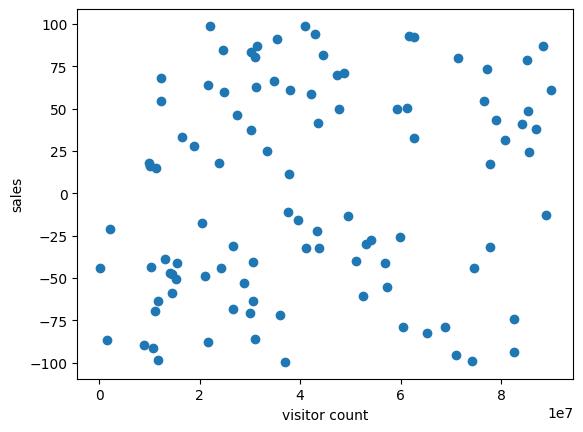

In [41]:
plt.scatter(data.visitor_count,data.sales)
plt.xlabel('visitor count')
plt.ylabel('sales')

# **To store into excel using pandas: data.to_excel(filepath to convert)**

In [42]:
data.visitor_count ## data['visitor_count']

0     37720540
1     37947790
2     27418150
3     26642260
4     11161360
        ...   
95    79063660
96    13175920
97    44488720
98    52493410
99    30187450
Name: visitor_count, Length: 100, dtype: int64

# **Splitting data into features and Targets**  sklearn will take input features only if it is in 2d array so converting the series of array to 2d by using reshape with converts data into single column data

In [43]:
X=data.iloc[:,0].values.reshape(-1,1)  ## .values will convert dataframe into series of array value and iloc is integer based location
Y=data.iloc[:,1].values

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [45]:
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [46]:
m=reg.coef_   ## coefficients printing
print(m)
c=reg.intercept_
print(c)

[6.87127402e-07]
-26.08920138298391


# **Prediction of Y**

In [47]:
y_pred=reg.predict(X_test)
y_pred

array([ 21.2080246 ,  -4.54919343,  -7.24943921,  34.97362577,
        -1.39540234,  -2.20632948,  25.16383767,  -5.08950232,
        26.56157849,  28.2376059 ,  -9.41753917,   2.16140959,
       -13.14831114,  -0.71316728,  -9.19577567,  30.65950324,
       -12.03442265, -17.66632498, -18.74719012,  15.05189217])

# **Finding Score or accuracy by finding the difference between predicted values and ground truth value**

In [48]:
reg.score(X_test,Y_test) ## passing X_test - internally the predict function is run and values of Y_pred will be fetched here to compare with Y_test

-0.21357797342605878

In [50]:
reg.score(X_test,y_pred)

1.0